# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [6]:
print(cities)

['mount gambier', 'busselton', 'ayan', 'tomatlan', 'margate', 'saint george', 'marsa matruh', 'jamestown', 'ippy', 'dikson', 'mataura', 'kahului', 'ribeira grande', 'codrington', 'hithadhoo', 'thompson', 'iqaluit', 'zyryanka', 'yulara', 'saskylakh', 'sorland', 'ponta delgada', 'hermanus', 'saleaula', 'shirokiy', 'mariinskiy posad', 'hobart', 'kapaa', 'port blair', 'hilo', 'bud', 'qaanaaq', 'kodiak', 'ushuaia', 'acurenam', 'teguise', 'aksarka', 'katsuura', 'sirjan', 'bilma', 'cabo san lucas', 'avarua', 'carnarvon', 'hasaki', 'hirara', 'castro', 'rikitea', 'tsihombe', 'sitka', 'lorengau', 'bredasdorp', 'victoria', 'san quintin', 'belushya guba', 'saint-philippe', 'roseburg', 'puerto ayora', 'luderitz', 'balgazyn', 'pangnirtung', 'pokaran', 'barrow', 'loandjili', 'kruisfontein', 'coihaique', 'butaritari', 'port alfred', 'galesong', 'faanui', 'jilin', 'bambous virieux', 'cockburn harbour', 'fortuna', 'jalpan', 'mar del plata', 'matara', 'georgetown', 'cap malheureux', 'barentsburg', 'lebu'

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#create an empty list to put your data
city_info=[]

for i, city in enumerate(cities):
    
    try:
        city_url=base_url + f"&q={cities[i]}"
        print(city_url)
        request=requests.get(city_url).json()
        
        cityid=request["id"]
        latitude=request["coord"]["lat"]
        longitude=request["coord"]["lon"]
        humidity=request["main"]["humidity"]
        windspeed=request["wind"]["speed"]
        temperature=request["main"]["temp"]
        clouds=request["clouds"]["all"]
        
        #append that data
        city_info.append({"city":city,
                          "city id":cityid,
                         "latitude":latitude,
                         "longitude":longitude,
                         "humidity":humidity,
                         "windspeed":windspeed,
                         "temperature":temperature,
                         "cloud cover":clouds})
        print("getting info for " + city)
        
    except Exception as e:
            print("info not found for " + city)
            pass 


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=mount gambier
getting info for mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=busselton
getting info for busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=ayan
getting info for ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=tomatlan
getting info for tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=margate
getting info for margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=saint george
getting info for saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=marsa matruh
getting info for marsa matruh
http://api.openw

getting info for pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=pokaran
getting info for pokaran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=barrow
getting info for barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=loandjili
getting info for loandjili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=kruisfontein
getting info for kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=coihaique
getting info for coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=butaritari
getting info for butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=port alfred
getting info for p

getting info for marsaxlokk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=varsag
getting info for varsag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=kerman
getting info for kerman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=batagay
getting info for batagay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=jiazi
getting info for jiazi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=chokwe
getting info for chokwe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=domoni
getting info for domoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=torbay
getting info for torbay
http://api.openweathermap.org/data

getting info for russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=ust-kamchatsk
info not found for ust-kamchatsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=uetendorf
getting info for uetendorf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=sorong
getting info for sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=airai
getting info for airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=cayenne
getting info for cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=la ronge
getting info for la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=geraldton
getting info for geraldton
http:

getting info for khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=gisborne
getting info for gisborne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=hermiston
getting info for hermiston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=paradwip
info not found for paradwip
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=yorkton
getting info for yorkton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=idrinskoye
getting info for idrinskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=hazorasp
getting info for hazorasp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=bundaberg
getting info for bundaberg


getting info for turbat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=taganak
getting info for taganak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=nome
getting info for nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=muli
getting info for muli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=ootmarsum
getting info for ootmarsum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=ust-nera
getting info for ust-nera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=vaitape
getting info for vaitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=kaseda
getting info for kaseda
http://api.openweathermap.org/da

getting info for chadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=kokopo
getting info for kokopo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=byron bay
getting info for byron bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=tateyama
getting info for tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=mnogovershinnyy
getting info for mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=tual
getting info for tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=nchelenge
getting info for nchelenge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=narsaq
getting info for narsaq
http://a

getting info for olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=henties bay
getting info for henties bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=akdepe
getting info for akdepe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=jabinyanah
getting info for jabinyanah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=formoso do araguaia
info not found for formoso do araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=tumannyy
info not found for tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=manta
getting info for manta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=kambove
getting i

getting info for lokomotivnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=necochea
getting info for necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=lancaster
getting info for lancaster
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=shillong
getting info for shillong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=hargeysa
getting info for hargeysa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=beni suef
getting info for beni suef
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=huntington
getting info for huntington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=basco
getting info for basco
ht

getting info for lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=itacoatiara
getting info for itacoatiara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=porosozero
getting info for porosozero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=arlit
getting info for arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=hambantota
getting info for hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=gorontalo
getting info for gorontalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=hlobyne
getting info for hlobyne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=sault sainte marie
getting info for sau

getting info for marakkanam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=port hardy
getting info for port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=svay rieng
getting info for svay rieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=fuyang
getting info for fuyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=bismarck
getting info for bismarck
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=acapulco
getting info for acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=gallup
getting info for gallup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f881cfe4d4d58a879c725ac9da7b67b6&q=mareeba
getting info for mareeba
http://a

In [15]:
print(city_info)

[{'city': 'mount gambier', 'city id': 2156643, 'latitude': -37.8333, 'longitude': 140.7667, 'humidity': 76, 'windspeed': 8.05, 'temperature': 55.4, 'cloud cover': 75}, {'city': 'busselton', 'city id': 2075265, 'latitude': -33.65, 'longitude': 115.3333, 'humidity': 87, 'windspeed': 1.99, 'temperature': 55.99, 'cloud cover': 34}, {'city': 'ayan', 'city id': 2027316, 'latitude': 56.45, 'longitude': 138.1667, 'humidity': 81, 'windspeed': 3.74, 'temperature': 26.4, 'cloud cover': 32}, {'city': 'tomatlan', 'city id': 3981391, 'latitude': 19.9333, 'longitude': -105.25, 'humidity': 35, 'windspeed': 11.34, 'temperature': 84.13, 'cloud cover': 0}, {'city': 'margate', 'city id': 2643044, 'latitude': 51.3813, 'longitude': 1.3862, 'humidity': 78, 'windspeed': 5.01, 'temperature': 42.3, 'cloud cover': 0}, {'city': 'saint george', 'city id': 5546220, 'latitude': 37.1041, 'longitude': -113.5841, 'humidity': 22, 'windspeed': 16.11, 'temperature': 64.85, 'cloud cover': 1}, {'city': 'marsa matruh', 'city

### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [16]:
city_df = pd.DataFrame(city_info)
city_df

,city,city id,latitude,longitude,humidity,windspeed,temperature,cloud cover
0,mount gambier,2156643,-37.8333,140.7667,76,8.05,55.40,75
1,busselton,2075265,-33.6500,115.3333,87,1.99,55.99,34
2,ayan,2027316,56.4500,138.1667,81,3.74,26.40,32
3,tomatlan,3981391,19.9333,-105.2500,35,11.34,84.13,0
4,margate,2643044,51.3813,1.3862,78,5.01,42.30,0
...,...,...,...,...,...,...,...,...
579,vestmanna,2610343,62.1564,-7.1664,100,12.66,46.40,90
580,manavalakurichi,1263942,8.1333,77.3000,83,2.30,80.60,20
581,kuytun,2021093,54.3419,101.5036,69,6.35,39.42,27
582,ryotsu,1853371,38.0833,138.4333,72,10.36,59.00,75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

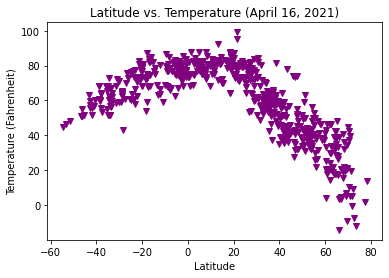

In [72]:
fig, ax = plt.subplots()
ax.plot(city_df["latitude"], city_df["temperature"], marker = "v", color="purple", linestyle = "None")
ax.set_xlabel("Latitude")
ax.set_ylabel("Temperature (Fahrenheit)")
ax.set_title("Latitude vs. Temperature (April 16, 2021)")
plt.show()

#### Latitude vs. Humidity Plot

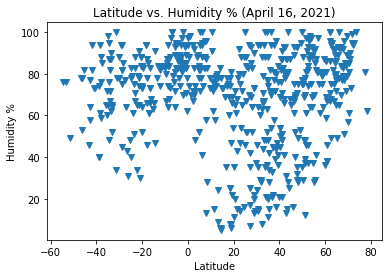

In [75]:
fig, ax = plt.subplots()
ax.plot(city_df["latitude"], city_df["humidity"], marker = "v", linestyle = "None")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity %")
ax.set_title("Latitude vs. Humidity % (April 16, 2021)")
plt.show()

#### Latitude vs. Cloudiness Plot

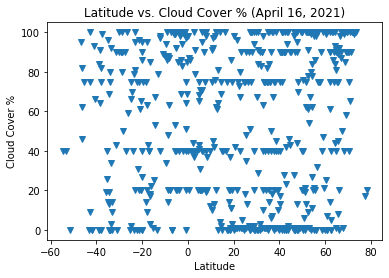

In [74]:
fig, ax = plt.subplots()
ax.plot(city_df["latitude"], city_df["cloud cover"], marker = "v", linestyle = "None")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloud Cover %")
ax.set_title("Latitude vs. Cloud Cover % (April 16, 2021)")
plt.show()

#### Latitude vs. Wind Speed Plot

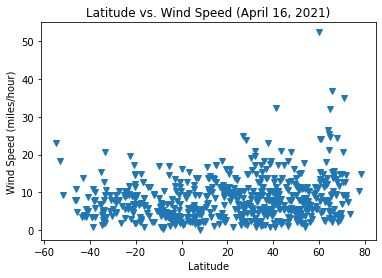

In [76]:
fig, ax = plt.subplots()
ax.plot(city_df["latitude"], city_df["windspeed"], marker = "v", linestyle = "None")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (miles/hour)")
ax.set_title("Latitude vs. Wind Speed (April 16, 2021)")
plt.show()

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

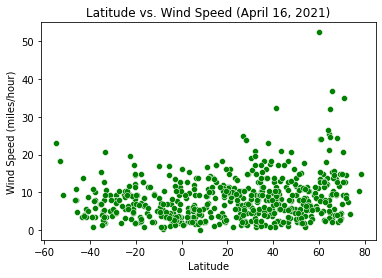

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

g = sns.scatterplot(x="latitude", y="windspeed", color="green", data=city_df)
g.set_title("Latitude vs. Wind Speed (April 16, 2021)")
g.set(xlabel="Latitude", ylabel="Wind Speed (miles/hour)")
plt.show()

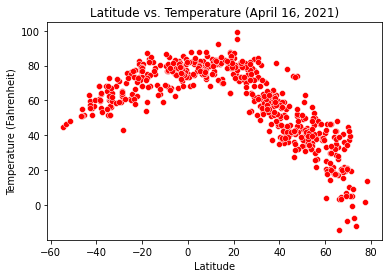

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

h = sns.scatterplot(x="latitude", y="temperature", color="red", data=city_df)
h.set_title("Latitude vs. Temperature (April 16, 2021)")
h.set(xlabel="Latitude", ylabel="Temperature (Fahrenheit)")
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

In [ ]:
# There does not seem to be a strong correlation between latitude and cloud cover, as one might expect - 
# everywhere I've lived has has a mix of cloudy/stormy, sunny, and in-between days.

# Also as you'd expect, there is a correlation between latitude and temperature: in general, the closer a location
# is to the equator (0 degrees latitude), the warmer its temperature.

# Humidity seems to be consistently high across all latitudes included in this dataset - the tropics are, well,
# tropical!

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 